In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("../Results/Flow_Spin/Data_01/iRB_064x128_M1.0e+00_u1.0e-02_U1.0e-02_Ca1.00e-01/S0.50_n4749/Configs/c005_Satu.json", 'r') as file:
    data = json.load(file)

# Cij_exp, Pij_exp, Tijk_exp, S_exp, SS_exp, SSS_exp -> keys of data
# print properties data["key_name"]

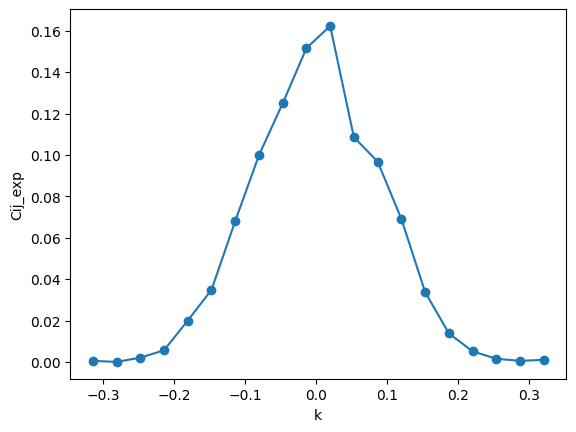

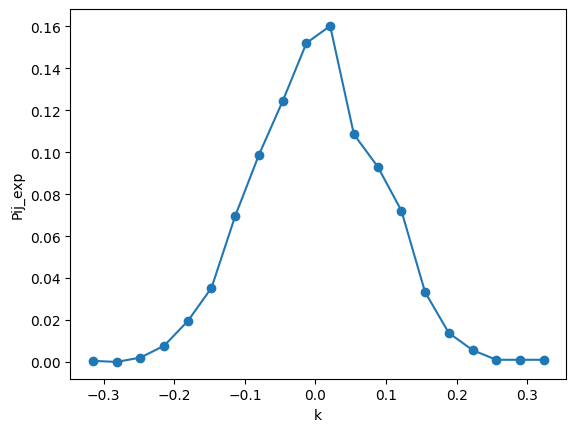

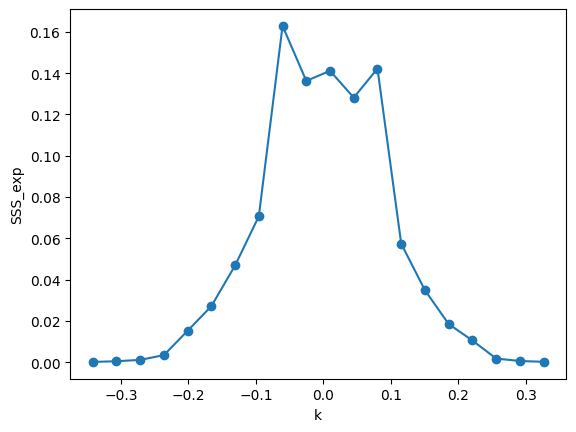

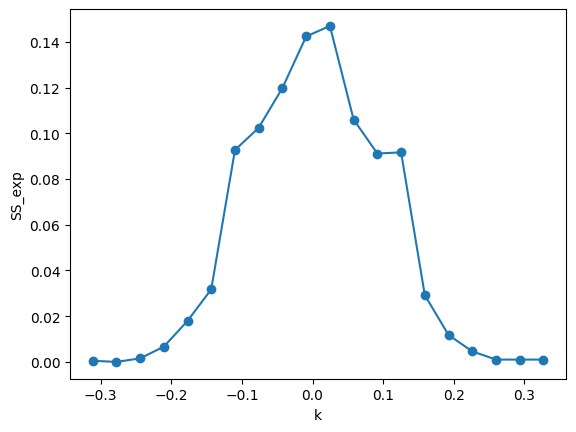

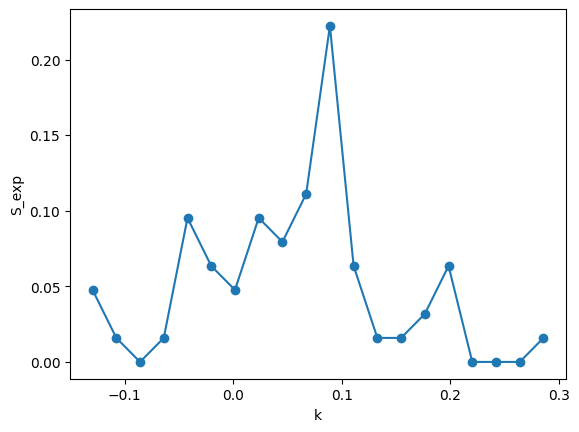

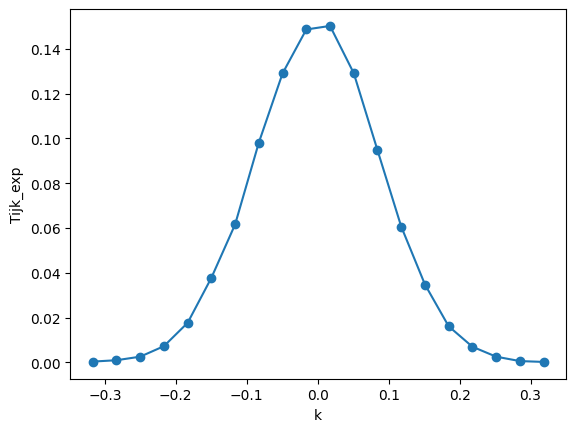

In [3]:
for key in data:
    hist, bin_edges = np.histogram(data[key], bins=20)

    # Normalizar o histograma para que seja uma distribuição de probabilidade
    P_k = hist / np.sum(hist)

    # Calcular o centro de cada bin (os valores de k)
    k = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Plotar P(k) versus k
    plt.plot(k, P_k, marker='o', linestyle='-')
    plt.xlabel('k')
    plt.ylabel(key)
    plt.show()


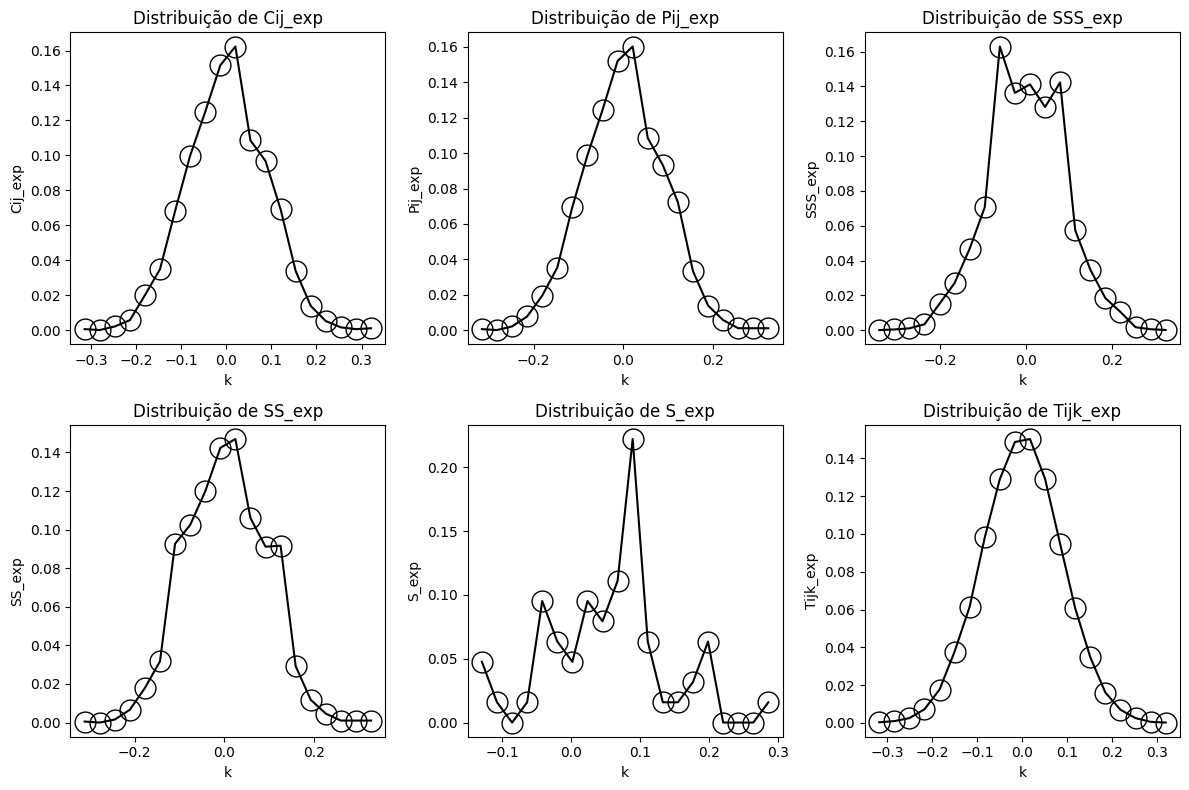

In [11]:
# Assumindo que `data` é um dicionário com as chaves que queremos plotar
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
fig.tight_layout(pad=5.0)

# Iterar pelas chaves e subplots
for i, key in enumerate(data.keys()):
    hist, bin_edges = np.histogram(data[key], bins=20)

    # Normalizar o histograma para que seja uma distribuição de probabilidade
    P_k = hist / np.sum(hist)

    # Calcular o centro de cada bin (os valores de k)
    k = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Determinar a posição no subplot (linha e coluna)
    ax = axs[i // 3, i % 3]
    ax.plot(k, P_k, marker='o', linestyle='-', markersize=15, mec='k', mfc='none', color='k')
    ax.set_xlabel('k')
    ax.set_ylabel(key)
    ax.set_title(f'Distribuição de {key}')

# Ajustar o layout para que os gráficos não se sobreponham
plt.tight_layout()
plt.savefig("../presentation/exp_means_iRB_064x128_M1.0e+00_u1.0e-02_U1.0e-02_Ca1.00e-01_S0.50_n4749_c005_Satu.pdf", dpi=300)
plt.show()